In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# generate signal
def generate_signal(omega, t, x0=np.float64(0)):
    
    # Get angle that should be swept
    angle_to_sweep = x0 + omega*t
    
    # Get the angle b/w limits
    normalized_angle = np.mod(angle_to_sweep, 2*np.pi)
    # Return answer
    if(np.allclose(normalized_angle, 2*np.pi, rtol=1e-5)):
        x = 0
    else:
        x = normalized_angle
    return x

In [3]:
def sample_signal(omega, Fs, tfinal):
    
    # Sample uniformly ts
    step = 1/Fs
    ts = np.arange(0, tfinal, step, dtype=np.float32)
    
    # Get xs for given ts
    xs = np.float32(generate_signal(omega, ts))
    
    return (xs, ts)


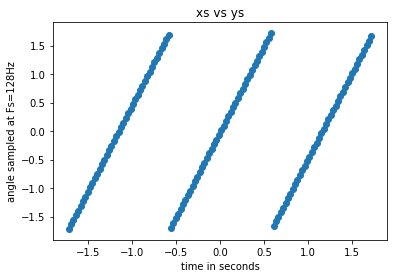

In [4]:
omega = 2*np.pi*(2+1)
Fs = 128
xs, ts = sample_signal(omega, Fs, 1)

#Normalize data
xs = (xs-np.mean(xs))/np.std(xs)
ts = (ts-np.mean(ts))/np.std(ts)
plt.title('xs vs ys')
plt.xlabel('time in seconds')
plt.ylabel('angle sampled at Fs=128Hz')
plt.scatter(ts, xs)
plt.show()

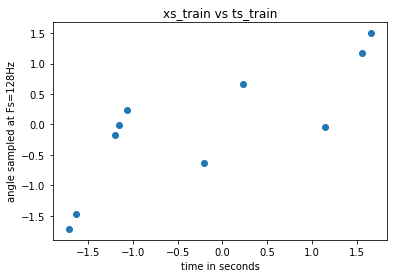

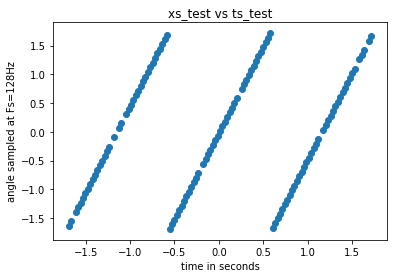

In [5]:
np.random.seed(1+2)
idx = np.sort(np.random.randint(len(xs), size=10))
xs_train = xs[idx]
ts_train = ts[idx]

xs_test =  np.delete(xs, idx)
ts_test =  np.delete(ts, idx)

plt.title('xs_train vs ts_train')
plt.xlabel('time in seconds')
plt.ylabel('angle sampled at Fs=128Hz')
plt.scatter(ts_train, xs_train)
plt.show()

plt.title('xs_test vs ts_test')
plt.xlabel('time in seconds')
plt.ylabel('angle sampled at Fs=128Hz')
plt.scatter(ts_test, xs_test)
plt.show()

In [6]:
def linear_square_method(order_of_model, data_xs_ts):
    powers = np.arange(0, order_of_model+1, 1)
    
    #define the input matrix
    phi = np.power(np.float32([data_xs_ts[1]]).T , powers)
    
    weights = np.matmul(np.matmul(np.linalg.inv(np.matmul(phi.T, phi)), phi.T), np.float32([data_xs_ts[0]]).T)
    
    return(weights)

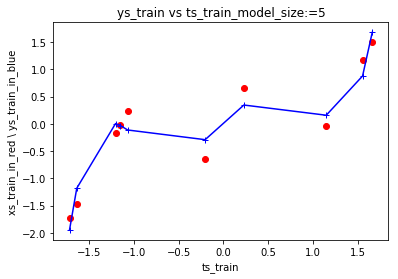

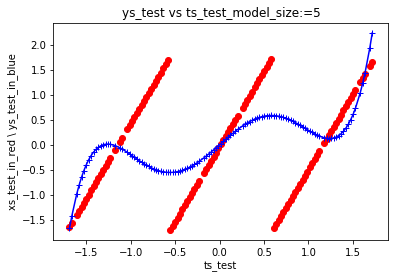

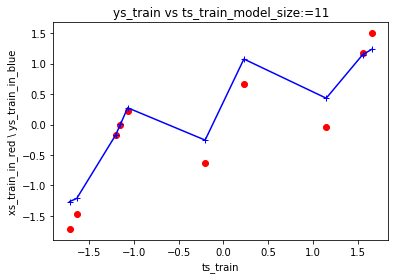

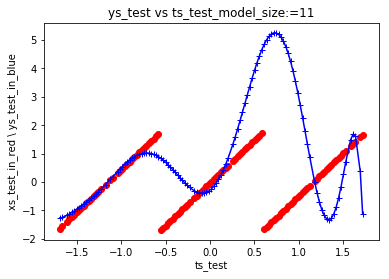

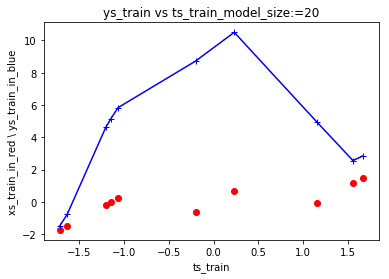

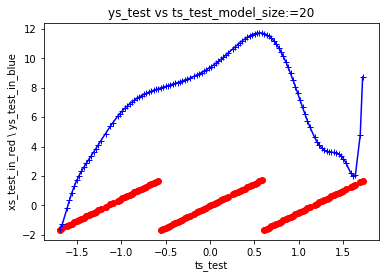

In [14]:
for i in [5, 11, 20]:
    weights = linear_square_method(i, [xs_train, ts_train])
    
    ys_train = np.polynomial.polynomial.polyval(ts_train, np.ravel(weights))
#     print(ys_train-xs_train)
    plt.title('ys_train vs ts_train_model_size:='+str(i))
    plt.xlabel('ts_train')
    plt.ylabel('xs_train_in_red \\ ys_train_in_blue')
    plt.scatter(ts_train, xs_train, c='red', marker='o')
    plt.plot(ts_train, ys_train, c='blue', marker='+')
    plt.show()
    
    ys_test = np.polynomial.polynomial.polyval(ts_test, np.ravel(weights))
#     print(ys_train-xs_train)
    plt.title('ys_test vs ts_test_model_size:='+str(i))
    plt.xlabel('ts_test')
    plt.ylabel('xs_test_in_red \\ ys_test_in_blue')
    plt.scatter(ts_test, xs_test, c='red', marker='o')
    plt.plot(ts_test, ys_test, c='blue', marker='+')
    plt.show()